# Aula 08 - Análise no Domínio da Frequência:

## 1 - Bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MRPy import MRPy

## 2 - Teorema da Preservação da Frequência:

[[<matplotlib.lines.Line2D at 0x1ec1401c730>]]

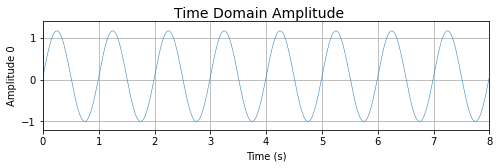

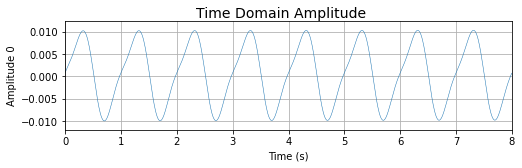

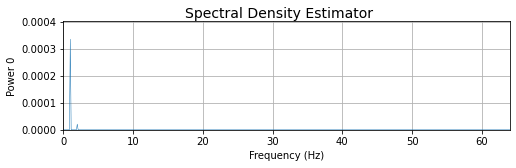

In [8]:
f0 = 1.0               # frequência da excitação (Hz)
F0 = 1.0               # Amplitude da Excitação (N)

m = 1.0                # massa do sistema (kg)
fn = 2.0               # frequência natural do sistema (Hz)
zt = 0.01              # amortecimento

F = F0*MRPy.harmonic(NX = 1, N = 1024, Td = 8, f0=1, phi=0)
F = (F + 2*F0)**1.05 -2*F0  # distorcendo a onda senoidal (ela deixa de ser um seno)

u = F.sdof_Fourier(fn, 0.01)/m     # dominio da frequência

F.plot_time(0, figsize=(8,2))
u.plot_time(1, figsize=(8,2))
u.plot_freq(2, figsize=(8,2))

## 3 - Equilíbrio no domínio da frequência:

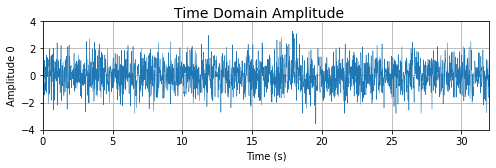

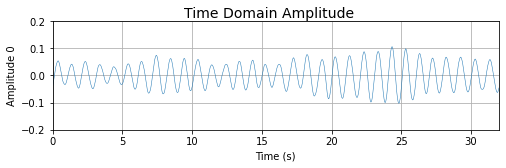

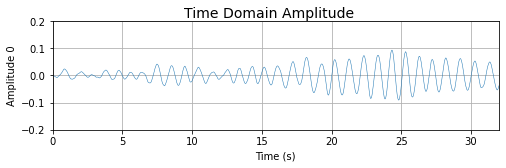

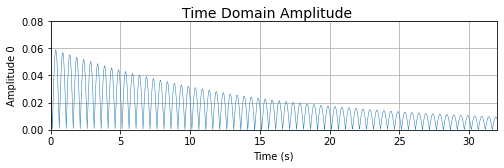

In [15]:
m = 1
fn = 1
zt = 0.01

F = MRPy.white_noise(1 , 2048, Td=32)     # ruido branco de 32 segundos
F = (F - F.mean())/F.std()                # variância unitária

uF = F.sdof_Fourier(fn, zt)/m
uD = F.sdof_Duhamel(fn, zt, 0, 0)/m

uE = np.abs(uF - uD)

f2 =   F.plot_time(2, figsize=(8,2), axis_t=(0, 32, -4.0, 4.0))
f3 =  uF.plot_time(3, figsize=(8,2), axis_t=(0, 32, -0.2, 0.2))
f4 =  uD.plot_time(4, figsize=(8,2), axis_t=(0, 32, -0.2, 0.2))
f5 =  uE.plot_time(5, figsize=(8,2), axis_t=(0, 32, 0, 0.08))

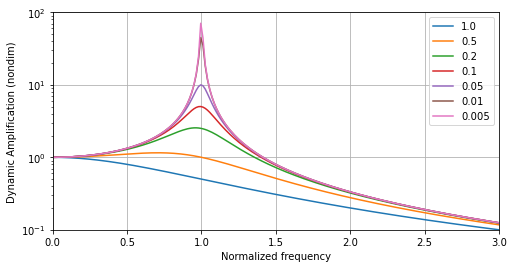

In [22]:
bt =  np.linspace(0, 3, 200)
zt = [1.0, 0.50,0.20, 0.10, 0.05, 0.01, 0.005]

plt.figure(6, figsize=(8,4))

for z in zt:
    A  = np.sqrt(1/((1 - bt**2)**2 + (2*z*bt)**2))
    f6 = plt.semilogy(bt, A)

plt.legend(zt)
plt.axis([0, 3, 0.1, 100])
plt.ylabel('Dynamic Amplification (nondim)')
plt.xlabel('Normalized frequency')
plt.grid(True)

Static displacement would be:  0.006m
Peak of dynamic displacement:  0.044m
Amplification factor is:       6.9 


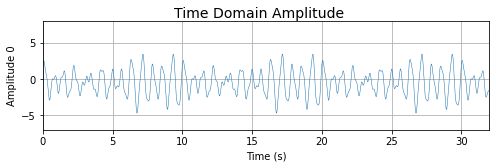

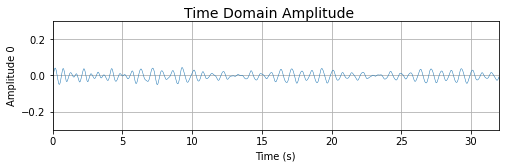

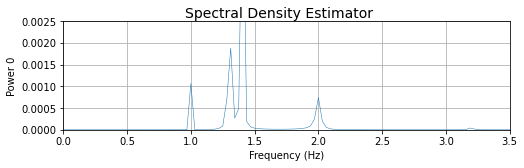

In [77]:
m   =  1.0                  # system mass (kg)
fn  =  2.0                  # system natural frequency (Hz)
zt  =  0.01                 # system damping ratio (nondim)
k   =  m*(2*np.pi*fn)**2    # implied stiffness

Td  =  32                   # load duration (s)
fs  =  1028                 # sampling rate (Hz)
N   =  Td*fs                # signal length
f0  =  1.0                  # excitation frequency (Hz)
F0  =  1.0                  # excitation amplitude (N)
phi =  0.0                  # phase angle (rad)

F   =  1.00*MRPy.harmonic(1, N, fs, f0=1.00, phi=0.0)
F  +=  1.72*MRPy.harmonic(1, N, fs, f0=1.40, phi=1.5)
F  +=  1.24*MRPy.harmonic(1, N, fs, f0=1.30, phi=0.3)
F  +=  0.53*MRPy.harmonic(1, N, fs, f0=3.20, phi=1.4)-0.5

ue  =  F0/k                        # static response
ud  =  F.sdof_Fourier(fn, zt)/m    # dynamic response
up  =  ud[0].max()                 # peak response

f7 =  F.plot_time(7, figsize=(8,2), axis_t=(0,32,-7,8))
f8 = ud.plot_time(8, figsize=(8,2), axis_t=(0,32,-0.3,0.3))
f9 = ud.plot_freq(9, figsize=(8,2), axis_f=(0,3.5,0,0.0025))

print('Static displacement would be: {0:6.3f}m'.format(ue))
print('Peak of dynamic displacement: {0:6.3f}m'.format(up))
print('Amplification factor is:      {0:4.1f} '.format(up/ue))